# Entregable 2 - Máster Data Science
###    EQUIPO 7:
> Andrés López

> Eduardo Arrieta

> Julio César Rios B

> María del Rosario Velázquez

## LIBRERIAS

In [ ]:
import pandas as pd
# from fastparquet import ParquetFile
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
import os
import numpy as np
# from sqlalchemy import create_engine

import io
import time
import pandas as pd
import os

import numpy as np

from io import StringIO
import glob
import pandas as pd
#import win32com.client
import os
import glob
from pathlib import Path  # Standard Python Module
from openpyxl import load_workbook, Workbook  # pip install openpyxl
import glob
import ssl
import math
from scipy.stats import linregress
import numpy as np
from datetime import datetime, date
from dateutil.relativedelta import relativedelta
import dateutil.relativedelta
from tqdm import tqdm
###Para cambiar los nombres de los meses a español
import locale
#locale.setlocale(locale.LC_TIME, 'es_ES')
import warnings
import pandas.io.sql as sqlio
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def column_report(df_x):

    a = pd.DataFrame(df_x.dtypes,columns={'dtype'}) #dataframe con data type

    b = pd.DataFrame(df_x.isna().sum(),columns={'nulls'}) #dataframe con numero de nulos

    b['%nulls'] = round(100*b['nulls']/df_x.shape[0],2) #columna con % de nulos

    c = df_x.describe(include='all').transpose()

    return a.join(b).join(c).sort_values('dtype')

## Consulta de Datos

In [ ]:
productos = pd.read_csv("/content/drive/MyDrive/NuclioDSC/TFM/datasets_TFM/product_ID_df.csv")
productos = productos.iloc[:,1:]

In [ ]:
demografica = pd.read_csv("/content/drive/MyDrive/NuclioDSC/TFM/datasets_TFM/sociodemographic_df.csv")
demografica = demografica.iloc[:,1:]

In [ ]:
comercial = pd.read_csv('/content/drive/MyDrive/NuclioDSC/TFM/datasets_TFM/commercial_activity_df.csv')
comercial = comercial.iloc[:,1:]

In [ ]:
ventas = pd.read_csv("/content/drive/MyDrive/NuclioDSC/TFM/datasets_TFM/sales_20_19_NEW.csv")
ventas =ventas.iloc[:,1:]

In [ ]:
tenencia = pd.read_csv("/content/drive/MyDrive/NuclioDSC/TFM/datasets_TFM/products_df.csv")
tenencia = tenencia.iloc[:,1:]

## TABLAS

<h2><u>PRODUCTOS<u><h2>

In [ ]:
productos

,product_ID,product_desc,family_product
0,4657,em_acount,account
1,3819,debit_card,payment_card
2,1364,pension_plan,pension_plan
3,2234,payroll,account
4,2235,payroll_account,account
5,8871,emc_account,account
6,2312,credit_card,payment_card
7,2335,short_term_deposit,investment
8,2336,long_term_deposit,investment
9,2673,securities,investment


<h2><u>DEMOGRAFICA<u><h2>

EXPLORACION

In [ ]:
demografica.head(2)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01,ES,29.0,H,35,N,87218.10
1,1050611,2018-01,ES,13.0,V,23,N,35548.74


In [ ]:
demografica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 363.9+ MB


In [ ]:
demografica.dtypes

pk_cid            int64
pk_partition     object
country_id       object
region_code     float64
gender           object
age               int64
deceased         object
salary          float64
dtype: object

In [ ]:
column_report(demografica)

,dtype,nulls,%nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,int64,0,0.00,5962924.0,NaN,NaN,NaN,1234929.799994,162302.043492,15891.0,1112532.0,1231097.0,1352339.0,1553689.0
age,int64,0,0.00,5962924.0,NaN,NaN,NaN,29.760416,11.980376,2.0,22.0,25.0,34.0,105.0
region_code,float64,2264,0.04,5960660.0,NaN,NaN,NaN,25.814403,13.595664,1.0,13.0,28.0,36.0,52.0
salary,float64,1541104,25.84,4421820.0,NaN,NaN,NaN,115583.291889,200006.637186,1202.73,61415.3175,88441.47,131309.22,28894395.51
pk_partition,object,0,0.00,5962924,17,2019-05,442995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_id,object,0,0.00,5962924,41,ES,5960672,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,object,25,0.00,5962899,2,H,3087502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
deceased,object,0,0.00,5962924,2,N,5961849,NaN,NaN,NaN,NaN,NaN,NaN,NaN


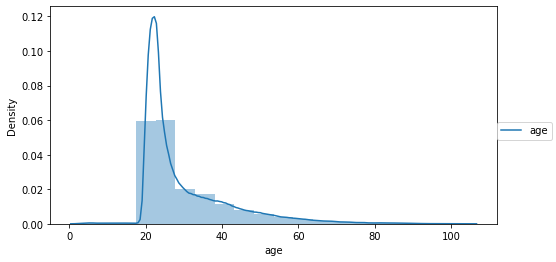

In [ ]:
## Gráfico de distribucion
fig = plt.figure(figsize=(8,4))
sns.distplot(demografica['age'],bins=20)
fig.legend(labels=['age'],loc='center right')
plt.show()

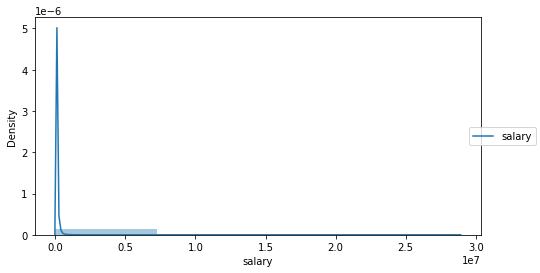

In [ ]:
## Gráfico de distribucion
fig = plt.figure(figsize=(8,4))
sns.distplot(demografica['salary'],bins=4)
fig.legend(labels=['salary'],loc='center right')
plt.show()

In [ ]:
demografica.corr()

,pk_cid,region_code,age,salary
pk_cid,1.000000,0.041581,-0.117927,-0.017198
region_code,0.041581,1.000000,0.018516,-0.018812
age,-0.117927,0.018516,1.000000,0.016079
salary,-0.017198,-0.018812,0.016079,1.000000


DATA CLEANING

In [ ]:
# elimina las filas con valores faltantes
demografica.dropna(subset = ['pk_cid', 'pk_partition', 'country_id','gender', 'age',
       'deceased'],inplace = True)

#  Seleccionar solo las filas de "Tabla demografica" que corresponden a clientes que están vivos
lista_muertos =  demografica[demografica['deceased'] == "S"]['pk_cid'].values
demografica =demografica[~demografica['pk_cid'].isin(lista_muertos)]

In [ ]:
# pasando a categoricos la variavle gender a través del campo 'gnd
demografica['gnd'] = np.where(demografica['gender']== 'H',1,0)


In [ ]:
####Transformación caetogrias country_region ('ct_rgn')

# uniendo los campos 'country_id' con 'region_code'
demografica['ct_rgn'] = demografica['country_id'] +'_'+demografica['region_code'].astype(str)

# obtenemos categorias asignadas a la variable 'ct_rgn'.
numbers, categories = pd.factorize(demografica['ct_rgn'])

# normalizamos los números asignados para obtener valores entre 0 y 1 (peso específico de cada categoria)
numbers_norm = numbers / (len(categories) - 1)
df_referencia_ct_rgn = demografica[['ct_rgn']]
df_referencia_ct_rgn['ct_rgn_norm'] = numbers_norm
df_referencia_ct_rgn.drop_duplicates(['ct_rgn_norm'],inplace=True)
demografica['ct_rgn_norm'] = numbers_norm
df_referencia_ct_rgn.reset_index(drop= True,inplace = True)

In [ ]:
demografica['pk_partition'] = pd.to_datetime(demografica['pk_partition'])


In [ ]:
demografica.head(2)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary,gnd,ct_rgn,ct_rgn_norm
0,1375586,2018-01-01,ES,29.0,H,35,N,87218.10,1,ES_29.0,0.00000
1,1050611,2018-01-01,ES,13.0,V,23,N,35548.74,0,ES_13.0,0.01087


In [ ]:
temp_dem = demografica[['pk_cid','pk_partition','age','gnd','ct_rgn_norm']]
temp_dem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961063 entries, 0 to 5962923
Data columns (total 5 columns):
 #   Column        Dtype         
---  ------        -----         
 0   pk_cid        int64         
 1   pk_partition  datetime64[ns]
 2   age           int64         
 3   gnd           int64         
 4   ct_rgn_norm   float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 272.9 MB


<h2><u>COMERCIAL<u><h2>

EXPLORACION

In [ ]:
comercial.head(2)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01,2018-01,KHL,1.0,02 - PARTICULARES
1,1050611,2018-01,2015-08,KHE,0.0,03 - UNIVERSITARIO


In [ ]:
comercial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 6 columns):
 #   Column           Dtype  
---  ------           -----  
 0   pk_cid           int64  
 1   pk_partition     object 
 2   entry_date       object 
 3   entry_channel    object 
 4   active_customer  float64
 5   segment          object 
dtypes: float64(1), int64(1), object(4)
memory usage: 273.0+ MB


In [ ]:
comercial.dtypes

pk_cid               int64
pk_partition        object
entry_date          object
entry_channel       object
active_customer    float64
segment             object
dtype: object

In [ ]:
column_report(comercial)

,dtype,nulls,%nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_cid,int64,0,0.00,5962924.0,NaN,NaN,NaN,1234929.799994,162302.043492,15891.0,1112532.0,1231097.0,1352339.0,1553689.0
active_customer,float64,0,0.00,5962924.0,NaN,NaN,NaN,0.403384,0.490577,0.0,0.0,0.0,1.0,1.0
pk_partition,object,0,0.00,5962924,17,2019-05,442995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entry_date,object,0,0.00,5962924,53,2016-10,382473,NaN,NaN,NaN,NaN,NaN,NaN,NaN
entry_channel,object,133033,2.23,5829891,68,KHE,3113947,NaN,NaN,NaN,NaN,NaN,NaN,NaN
segment,object,133944,2.25,5828980,3,03 - UNIVERSITARIO,3900166,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
count_channel = comercial['entry_channel'].value_counts()
count_channel

KHE    3113947
KFC     890620
KHQ     590280
KAT     416084
KHK     230197
        ...   
KEJ          8
KHS          5
KDA          2
KFP          2
KDS          1
Name: entry_channel, Length: 68, dtype: int64

In [ ]:
count_segment = comercial['segment'].value_counts()
count_segment

03 - UNIVERSITARIO    3900166
02 - PARTICULARES     1830875
01 - TOP                97939
Name: segment, dtype: int64

DATA CLEANING

In [ ]:
comercial.dropna(inplace=True)
counts = comercial['entry_channel'].value_counts()
weights = counts / len(comercial)
weights_dict = weights.to_dict()
comercial['entry_weights'] = comercial['entry_channel'].map(weights_dict)
df_referencia_entry_weights = comercial[['entry_channel','entry_weights']]
df_referencia_entry_weights.drop_duplicates(['entry_weights'],inplace=True)
comercial['pk_partition'] = pd.to_datetime(comercial['pk_partition'])
comercial['entry_date'] = pd.to_datetime(comercial['entry_date'])
comercial['anti_cli'] = (comercial['pk_partition'].dt.year - comercial['entry_date'].dt.year) * 12 + (comercial['pk_partition'].dt.month - comercial['entry_date'].dt.month)
comercial['seg_cli'] = comercial['segment'].str.split("-",expand=True)[0]

In [ ]:
comercial['anti_cli'] = comercial['anti_cli'].astype(float)
comercial['seg_cli'] = comercial['seg_cli'].astype(int)
comercial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5828370 entries, 0 to 5962922
Data columns (total 9 columns):
 #   Column           Dtype         
---  ------           -----         
 0   pk_cid           int64         
 1   pk_partition     datetime64[ns]
 2   entry_date       datetime64[ns]
 3   entry_channel    object        
 4   active_customer  float64       
 5   segment          object        
 6   entry_weights    float64       
 7   anti_cli         float64       
 8   seg_cli          int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(2)
memory usage: 444.7+ MB


In [ ]:
comercial = comercial[['pk_cid', 'pk_partition','entry_weights', 'anti_cli', 'seg_cli']]

In [ ]:
comercial.drop_duplicates(['pk_cid', 'pk_partition','entry_weights', 'anti_cli', 'seg_cli'],inplace = True)


In [ ]:
comercial.head(2)

,pk_cid,pk_partition,entry_weights,anti_cli,seg_cli
0,1375586,2018-01-01,0.007158,0.0,2
1,1050611,2018-01-01,0.534273,29.0,3


In [ ]:
temp_com = comercial[['pk_cid', 'pk_partition','entry_weights', 'anti_cli', 'seg_cli']]
temp_com['pk_partition'] = pd.to_datetime(temp_com['pk_partition'],format = '%Y-%m')

<h2><u>VENTAS<u><h2>

EXPLORACION

In [ ]:
ventas.head(2)

,pk_sale,cid,month_sale,product_ID,net_margin
0,6666,33620,2018-05-01,2335,952.9
1,6667,35063,2018-06-01,2335,1625.2


In [ ]:
ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240773 entries, 0 to 240772
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   pk_sale     240773 non-null  int64  
 1   cid         240773 non-null  int64  
 2   month_sale  240773 non-null  object 
 3   product_ID  240773 non-null  int64  
 4   net_margin  240773 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 9.2+ MB


In [ ]:
ventas.dtypes

pk_sale         int64
cid             int64
month_sale     object
product_ID      int64
net_margin    float64
dtype: object

In [ ]:
column_report(ventas)

,dtype,nulls,%nulls,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pk_sale,int64,0,0.0,240773.0,NaN,NaN,NaN,127052.0,69505.322519,6666.0,66859.0,127052.0,187245.0,247438.0
cid,int64,0,0.0,240773.0,NaN,NaN,NaN,1363933.721381,175172.069037,15891.0,1301012.0,1409253.0,1475320.0,1553571.0
product_ID,int64,0,0.0,240773.0,NaN,NaN,NaN,3945.408202,1632.8217,1119.0,2312.0,4657.0,4657.0,9001.0
net_margin,float64,0,0.0,240773.0,NaN,NaN,NaN,606.878164,1735.806089,25.0,61.4,69.1,79.2,18466.4
month_sale,object,0,0.0,240773,16,2018-10-01,27693,NaN,NaN,NaN,NaN,NaN,NaN,NaN


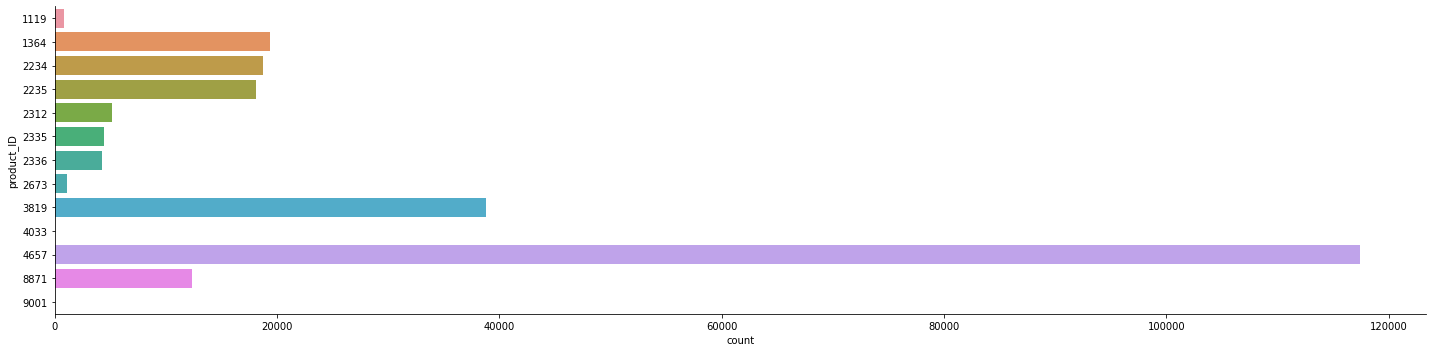

In [ ]:
## Frecuancia de venta por producto
ax = sns.catplot(y="product_ID", kind="count", data=ventas, height=5, aspect=4, orient='h')

DATA CLEANING

In [ ]:
ventas.drop_duplicates(['pk_sale', 'cid', 'month_sale', 'product_ID', 'net_margin'],inplace = True)

In [ ]:
len(ventas['pk_sale'].unique())-len(ventas)

0

In [ ]:
ventas['target'] = np.where(ventas['net_margin']>0,1,0)
ventas.sort_values(['net_margin'],ascending=False)
ventas.rename(columns={'month_sale':'pk_partition'}, inplace=True)
ventas.rename(columns={'cid':'pk_cid'}, inplace=True)
ventas['pk_partition'] = pd.to_datetime(ventas['pk_partition'],dayfirst = True)

In [ ]:
temp_ventas = ventas

In [ ]:
temp_ventas.head(2)

,pk_sale,pk_cid,pk_partition,product_ID,net_margin,target
0,6666,33620,2018-05-01,2335,952.9,1
1,6667,35063,2018-06-01,2335,1625.2,1


In [ ]:
temp_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240773 entries, 0 to 240772
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   pk_sale       240773 non-null  int64         
 1   pk_cid        240773 non-null  int64         
 2   pk_partition  240773 non-null  datetime64[ns]
 3   product_ID    240773 non-null  int64         
 4   net_margin    240773 non-null  float64       
 5   target        240773 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 12.9 MB


<h2><u>MERGE DE TABLAS<u><h2>

In [ ]:
df = temp_dem.merge(temp_com,on = ['pk_cid','pk_partition'],how = 'left')
df = df.merge(temp_ventas,on = ['pk_cid','pk_partition'],how = 'left')
df.sort_values(['target'],inplace = True,ascending=True)
df.drop_duplicates(['pk_cid','pk_partition'],inplace=True)

In [ ]:
df

,pk_cid,pk_partition,age,gnd,ct_rgn_norm,entry_weights,anti_cli,seg_cli,pk_sale,product_ID,net_margin,target
239399,546275,2018-02-01,39,1,0.250000,0.039485,0.0,2.0,130558.0,4657.0,87.3,1.0
3021500,1496895,2018-11-01,22,0,0.423913,NaN,NaN,NaN,88695.0,8871.0,78.4,1.0
3021519,1496855,2018-11-01,22,1,0.402174,NaN,NaN,NaN,219759.0,4657.0,79.8,1.0
3021522,1496858,2018-11-01,30,1,0.543478,NaN,NaN,NaN,219760.0,4657.0,66.6,1.0
3021526,1496862,2018-11-01,20,1,0.282609,NaN,NaN,NaN,219761.0,4657.0,64.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5999125,1166766,2019-05-01,25,0,0.021739,0.534273,33.0,3.0,NaN,NaN,NaN,NaN
5999126,1166765,2019-05-01,22,0,0.021739,0.534273,33.0,3.0,NaN,NaN,NaN,NaN
5999127,1166764,2019-05-01,23,0,0.369565,0.534273,33.0,3.0,NaN,NaN,NaN,NaN
5999128,1166763,2019-05-01,47,1,0.021739,0.534273,33.0,2.0,NaN,NaN,NaN,NaN


In [ ]:
df['target'].value_counts()[1]

202623

In [ ]:
df['target'] = np.where(df['target'].isnull(),0,df['target'])

In [ ]:
df

,pk_cid,pk_partition,age,gnd,ct_rgn_norm,entry_weights,anti_cli,seg_cli,pk_sale,product_ID,net_margin,target
239399,546275,2018-02-01,39,1,0.250000,0.039485,0.0,2.0,130558.0,4657.0,87.3,1.0
3021500,1496895,2018-11-01,22,0,0.423913,NaN,NaN,NaN,88695.0,8871.0,78.4,1.0
3021519,1496855,2018-11-01,22,1,0.402174,NaN,NaN,NaN,219759.0,4657.0,79.8,1.0
3021522,1496858,2018-11-01,30,1,0.543478,NaN,NaN,NaN,219760.0,4657.0,66.6,1.0
3021526,1496862,2018-11-01,20,1,0.282609,NaN,NaN,NaN,219761.0,4657.0,64.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5999125,1166766,2019-05-01,25,0,0.021739,0.534273,33.0,3.0,NaN,NaN,NaN,0.0
5999126,1166765,2019-05-01,22,0,0.021739,0.534273,33.0,3.0,NaN,NaN,NaN,0.0
5999127,1166764,2019-05-01,23,0,0.369565,0.534273,33.0,3.0,NaN,NaN,NaN,0.0
5999128,1166763,2019-05-01,47,1,0.021739,0.534273,33.0,2.0,NaN,NaN,NaN,0.0


In [ ]:
df.fillna(0, inplace=True)

In [ ]:
df

,pk_cid,pk_partition,age,gnd,ct_rgn_norm,entry_weights,anti_cli,seg_cli,pk_sale,product_ID,net_margin,target
239399,546275,2018-02-01,39,1,0.250000,0.039485,0.0,2.0,130558.0,4657.0,87.3,1.0
3021500,1496895,2018-11-01,22,0,0.423913,0.000000,0.0,0.0,88695.0,8871.0,78.4,1.0
3021519,1496855,2018-11-01,22,1,0.402174,0.000000,0.0,0.0,219759.0,4657.0,79.8,1.0
3021522,1496858,2018-11-01,30,1,0.543478,0.000000,0.0,0.0,219760.0,4657.0,66.6,1.0
3021526,1496862,2018-11-01,20,1,0.282609,0.000000,0.0,0.0,219761.0,4657.0,64.9,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5999125,1166766,2019-05-01,25,0,0.021739,0.534273,33.0,3.0,0.0,0.0,0.0,0.0
5999126,1166765,2019-05-01,22,0,0.021739,0.534273,33.0,3.0,0.0,0.0,0.0,0.0
5999127,1166764,2019-05-01,23,0,0.369565,0.534273,33.0,3.0,0.0,0.0,0.0,0.0
5999128,1166763,2019-05-01,47,1,0.021739,0.534273,33.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.sort_values(by=['pk_cid', 'pk_partition'])

# Agregar nueva columna TARGET_1 (DATO DEL MES ANTERIOR)
df['TARGET_1'] = df.groupby('pk_cid')['target'].shift(1)



In [ ]:
df

,pk_cid,pk_partition,age,gnd,ct_rgn_norm,entry_weights,anti_cli,seg_cli,pk_sale,product_ID,net_margin,target,TARGET_1
1490512,15891,2018-07-01,59,1,0.195652,0.000000,0.0,0.0,130004.0,4657.0,66.4,1.0,NaN
2184060,15891,2018-08-01,59,1,0.195652,0.071314,1.0,2.0,0.0,0.0,0.0,0.0,1.0
2983326,16063,2018-11-01,62,1,0.195652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3651932,16063,2018-12-01,62,1,0.195652,0.071314,1.0,2.0,0.0,0.0,0.0,0.0,0.0
4055295,16063,2019-01-01,62,1,0.195652,0.071314,2.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5714801,1553685,2019-05-01,52,0,0.010870,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5714800,1553686,2019-05-01,30,1,0.228261,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5714799,1553687,2019-05-01,21,0,0.195652,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5714798,1553688,2019-05-01,43,1,0.239130,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
df.columns

Index(['pk_cid', 'pk_partition', 'age', 'gnd', 'ct_rgn_norm', 'entry_weights',
       'anti_cli', 'seg_cli', 'pk_sale', 'product_ID', 'net_margin', 'target',
       'TARGET_1'],
      dtype='object')

In [ ]:
df.dropna(subset = ['TARGET_1'],inplace=True) #Elimino aquellos casos que no cuentan con información el mes anterior no compraron y no registran actividad comercial


In [ ]:
df=df[['pk_cid', 'pk_partition', 'age', 'gnd', 'ct_rgn_norm', 'entry_weights','anti_cli', 'seg_cli','target','TARGET_1']]

In [ ]:
merge_target=df

In [ ]:
merge_target['target'].value_counts()[1]

109074

In [ ]:
cant_mes1= merge_target.groupby(['pk_partition','target'])['target'].count().unstack()
cant_mes1


target,0.0,1.0
pk_partition,,
2018-02-01,230294,8363
2018-03-01,235582,6163
2018-04-01,239247,5161
2018-05-01,241982,4809
2018-06-01,242540,6613
2018-07-01,250075,5314
2018-08-01,330297,7906
2018-09-01,345248,6600
2018-10-01,364828,9146


In [ ]:
## ELECCION DEL MES PARA ENTRENAMIENTO Y TEST
casos = merge_target[merge_target['pk_partition']=='2018-09-01']
casos_1= casos[casos['target']==1]
casos_0 = casos[casos['target']==0]
casos_0_sample = casos_0.sample(int(len(casos_1)*1),random_state=1)
casos_modelo_60 = pd.concat([casos_1,casos_0_sample])
len(casos_modelo_60)-len(casos_1)-len(casos_0_sample)

0

In [ ]:
cant_mes2= casos_modelo_60.groupby(['pk_partition','target'])['target'].count().unstack()
cant_mes2

target,0.0,1.0
pk_partition,,
2018-09-01,6600,6600


In [ ]:
casos_modelo_60

,pk_cid,pk_partition,age,gnd,ct_rgn_norm,entry_weights,anti_cli,seg_cli,target,TARGET_1
2187442,17457,2018-09-01,53,1,0.195652,0.071314,12.0,2.0,1.0,0.0
2187599,66770,2018-09-01,46,1,0.489130,0.018580,4.0,1.0,1.0,0.0
2187600,66841,2018-09-01,64,1,0.195652,0.071314,17.0,2.0,1.0,0.0
2187638,87067,2018-09-01,48,0,0.195652,0.071314,18.0,2.0,1.0,0.0
2187526,89065,2018-09-01,49,0,0.195652,0.000034,19.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2260987,1229850,2018-09-01,21,0,0.336957,0.071314,21.0,2.0,0.0,0.0
2503691,1371548,2018-09-01,21,1,0.195652,0.534273,9.0,3.0,0.0,0.0
2475659,1408538,2018-09-01,20,1,0.184783,0.101277,2.0,3.0,0.0,0.0
2211041,1253597,2018-09-01,47,1,0.347826,0.152733,17.0,2.0,0.0,0.0


In [ ]:
muestra=casos_modelo_60

In [ ]:
muestra.columns

Index(['pk_cid', 'pk_partition', 'age', 'gnd', 'ct_rgn_norm', 'entry_weights',
       'anti_cli', 'seg_cli', 'target', 'TARGET_1'],
      dtype='object')

In [ ]:
correlacion=muestra[['age', 'gnd', 'ct_rgn_norm', 'entry_weights',
       'anti_cli', 'seg_cli','TARGET_1','target']]

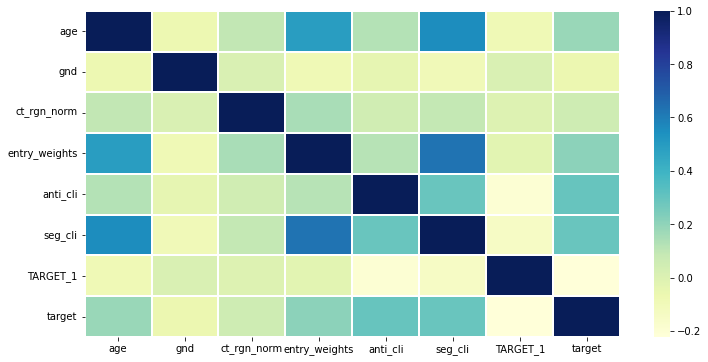

In [ ]:
plt.figure(figsize=(12, 6))
corr = correlacion.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                 linewidths=.2, cmap="YlGnBu")

In [ ]:
correlacion.apply(lambda x: pd.factorize(x)[0]).corr()

,age,gnd,ct_rgn_norm,entry_weights,anti_cli,seg_cli,TARGET_1,target
age,1.000000,-0.073294,0.097370,0.492294,0.126183,0.552150,-0.084711,0.182704
gnd,-0.073294,1.000000,0.012088,-0.087557,-0.037471,-0.096752,0.012220,-0.062490
ct_rgn_norm,0.097370,0.012088,1.000000,0.146894,0.046051,0.091515,-0.003184,0.058811
entry_weights,0.492294,-0.087557,0.146894,1.000000,0.118055,0.629705,-0.023546,0.208128
anti_cli,0.126183,-0.037471,0.046051,0.118055,1.000000,0.291012,-0.196370,0.297500
seg_cli,0.552150,-0.096752,0.091515,0.629705,0.291012,1.000000,-0.142614,0.290969
TARGET_1,-0.084711,0.012220,-0.003184,-0.023546,-0.196370,-0.142614,1.000000,-0.222323
target,0.182704,-0.062490,0.058811,0.208128,0.297500,0.290969,-0.222323,1.000000


# **ENTRENAMIENTO**

In [ ]:
df_modelo =muestra
df_modelo = df_modelo.iloc[:,2:]

In [ ]:
df_modelo

,age,gnd,ct_rgn_norm,entry_weights,anti_cli,seg_cli,target,TARGET_1
2187442,53,1,0.195652,0.071314,12.0,2.0,1.0,0.0
2187599,46,1,0.489130,0.018580,4.0,1.0,1.0,0.0
2187600,64,1,0.195652,0.071314,17.0,2.0,1.0,0.0
2187638,48,0,0.195652,0.071314,18.0,2.0,1.0,0.0
2187526,49,0,0.195652,0.000034,19.0,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...
2260987,21,0,0.336957,0.071314,21.0,2.0,0.0,0.0
2503691,21,1,0.195652,0.534273,9.0,3.0,0.0,0.0
2475659,20,1,0.184783,0.101277,2.0,3.0,0.0,0.0
2211041,47,1,0.347826,0.152733,17.0,2.0,0.0,0.0


In [ ]:
len(df_modelo)

13200

In [ ]:
!pip install yellowbrick==1.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement yellowbrick==1.3.1 (from versions: 0.1, 0.3a1, 0.3.1, 0.3.2, 0.3.3, 0.4, 0.4.1, 0.4.2, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9.1, 1.0, 1.0.post1, 1.0.1, 1.1, 1.2, 1.2.1, 1.3, 1.3.post1, 1.4, 1.5)
ERROR: No matching distribution found for yellowbrick==1.3.1


In [ ]:
!pip install numpy==1.20


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.10-py3-none-any.whl (320 kB)
  Using cached pyod-1.0.7.tar.gz (147 kB)
  Preparing metadata (setup.py) ... done
  Using cached pyLDAvis-3.4.0-py3-none-any.whl (2.6 MB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached Boruta-0.3-py3-none-any.whl (56 kB)
  Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
  Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached imbalanced_learn-0.7.0-py3-none-any.whl (167 kB)
  Using cached lightgbm-3.3.5-py3-none-manylinux1_x86_64.whl (2.0 MB)
  Using cached spacy-2.3.9-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.0 MB)
  Using cached scikit_learn-0.23.2-cp38-cp38-manylinux1_x86_64.whl (6.8 MB)
  Using cached numba-0.54.1-cp38-cp38-manylinux2014_x86_64.manylinux_2_17_x86_6

In [ ]:
pip install --use-deprecated=legacy-resolver pycaret[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 KB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 MB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.0/235.0 KB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 387.8/387.8 KB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 11.0 MB/s eta 0:00:00
     ━━━━━━━

In [ ]:
from pycaret.classification import *



ImportError: ignored

In [ ]:
s = setup(df_modelo, target = 'target') ##presionar enter para que finalice

In [ ]:
best = compare_models()

In [ ]:
evaluate_model(best)

In [ ]:
save_model(best, 'model_train')

In [ ]:
plot_model(best, plot = 'auc')

In [ ]:
# Feature Importance Plot**
plot_model(best, plot = 'feature')

In [ ]:
# Confusion Matrix**
plot_model(best, plot = 'confusion_matrix')

# PREDICCION

In [ ]:
# Modificando formatos fecha
tenencia['pk_partition'] = pd.to_datetime(tenencia['pk_partition'])

In [ ]:
# Cambiando el formato de pk_partition de la tabla tendencia
tenencia['pk_partition'] = pd.to_datetime(tenencia['pk_partition'],dayfirst = True)
tenencia['pk_partition'] = tenencia['pk_partition'].dt.year.astype(str) +'-'+tenencia['pk_partition'].dt.month.astype(str) +'-'+ '01'
tenencia['pk_partition'] = pd.to_datetime(tenencia['pk_partition'],dayfirst = True)

In [ ]:
tenencia1=tenencia[tenencia.pk_partition== '2019-05-01']

In [ ]:
fecha_mes_anterior = pd.Timestamp('2019-04-01')
tenencia1['fecha_mes_anterior'] =fecha_mes_anterior

In [ ]:
tenencia1=tenencia1[['pk_cid', 'pk_partition','fecha_mes_anterior']]

In [ ]:
ventas['fecha_mes_anterior'] = ventas['pk_partition']###.astype(int)
data_predict=tenencia1.merge(ventas,on=['pk_cid','pk_partition'], how='left')

In [ ]:
data_predict=data_predict.merge(productos,on=['product_ID'], how='left')

In [ ]:
data_predict

In [ ]:
data_predict = data_predict.fillna(0)

In [ ]:
data_predict.columns

In [ ]:
df_prediccion = data_predict
df_prediccion.reset_index(inplace = True,drop = True)

In [ ]:
cant_mes1=df_prediccion.groupby(['pk_partition','product_desc'])['product_desc'].count().unstack()
cant_mes1

PRODUCTO : ELECCION DEL PRODUCTO

In [ ]:
##Ingresar Producto

casos = df_prediccion
casos_1= casos[casos['product_desc']=="payroll_account"]
casos_0 = casos[casos['product_desc']==0]

In [ ]:
# crear una muestra aleatoria del dataframe casos_0 con un tamaño del X% del número de filas en el dataframe casos_1
casos_0_sample = casos_0.sample(int(len(casos_1)*1),random_state=1)
casos_0_sample

In [ ]:
casos_modelo = pd.concat([casos_1,casos_0_sample])
len(casos_modelo)-len(casos_1)-len(casos_0_sample)

In [ ]:
casos_modelo

In [ ]:
muestra['pk_cid']=muestra['pk_cid'].astype(int)
casos_modelo['pk_cid']=casos_modelo['pk_cid'].astype(int)

In [ ]:
casos_modelo=casos_modelo.merge(muestra,on=['pk_cid'], how='left')
casos_modelo

In [ ]:
casos_modelo = casos_modelo.fillna(0)

In [ ]:
casos_modelo1_cli=casos_modelo[['pk_cid']]
casos_modelo1=casos_modelo[['age', 'gnd', 'ct_rgn_norm','entry_weights', 'anti_cli', 'seg_cli', 'TARGET_1' ]]
casos_modelo1

In [ ]:
df_modelo = casos_modelo1
len(df_modelo)

In [ ]:
df_modelo

In [ ]:
from pycaret.classification import load_model

# Load the trained model
model = load_model('/content/model_train')

# Use the model to make predictions
predictions = model.predict_proba(df_modelo)
predictions_1 = model.predict(df_modelo)

In [ ]:
df_modelo[['%_resid','%_prope']] = pd.DataFrame(predictions)


In [ ]:
df_modelo

In [ ]:
df_modelo_unido = casos_modelo1_cli.join(df_modelo)

In [ ]:
df_modelo_unido.head()

In [ ]:
df_modelo_unido = df_modelo_unido.sort_values(by='%_prope', ascending=False)
df_modelo_unido

In [ ]:
df_modelo_unido['percentil_compra'] = pd.cut(df_modelo_unido['%_prope'], bins=10, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10'])

print(df_modelo_unido)

In [ ]:
df_modelo_unido=df_modelo_unido[['pk_cid','%_prope','percentil_compra']]

In [ ]:
df_modelo_unido.head()

In [ ]:
df_modelo_unido.to_excel('/content/drive/MyDrive/NUCLIO/Proyecto/MACOSX/datasets_TFM/PROD_payroll_account.xlsx', index=False)